<a href="https://colab.research.google.com/github/JosegSuarezb/Integracion-de-los-datos/blob/main/Reto_parcial_Jose_Gregorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis #coeficiente de asimetria, kurtosis

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def metricas(LDA):
  u=np.mean(LDA)
  var=np.var(LDA)
  stdv=np.sqrt(var)
  cas=skew(LDA)
  ck=kurtosis(LDA)
  error_muestreo = stdv / np.sqrt(len(LDA))
     #que tipo de distribucion es
  if abs(cas)<0.5 and abs(ck)<0.5:
    tpdst="Posible distribucion normal"
  elif cas>0 and ck>3:
    if ck>=8:
      tpdst="Posible distribucion exponencial"
    elif ck>=6:
      tpdst="Posible distribucion gamma"
    else:
      tpdst="Posible distribucion Weibull"
  elif cas<0 and ck>3:
    tpdst="Posible distribucion beta"
  elif ck<3:
    tpdst="Posible distribucion uniforme"
  else:
    tpdst="No se puede determinar la distribucion"

  return u,var,stdv,cas,ck,error_muestreo, tpdst


#cargamos la base de datos

In [ ]:
nxl='/content/drive/MyDrive/Integracion de datos (enfasis)/3. Perdida Productividad_Zonas(I).xlsx'
XDBo=pd.read_excel(nxl, sheet_name='Datos Observados')
XDB1=pd.read_excel(nxl, sheet_name=1)
XDB2=pd.read_excel(nxl, sheet_name=2)
XDB3=pd.read_excel(nxl, sheet_name=3)
XDB4=pd.read_excel(nxl, sheet_name=4)

In [ ]:
LDAo=XDBo['LDA']
LDAe1=XDB1['LDA']
LDAe2=XDB2['LDA']
LDAe3=XDB3['LDA']
LDAe4=XDB4['LDA']

In [ ]:
def graficar(XLDA,XLDE):
  plt.figure()
  sns.histplot(XLDE, kde = True, bins = 10, color= "Darkblue")
  sns.histplot(XLDA, kde = True, bins = 10, color = "purple")
  plt.legend()
  plt.show()

<ipython-input-5-b7fcf9a28fdb>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


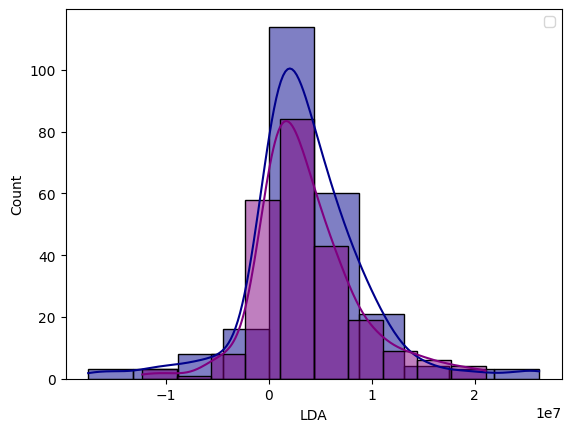

<ipython-input-5-b7fcf9a28fdb>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


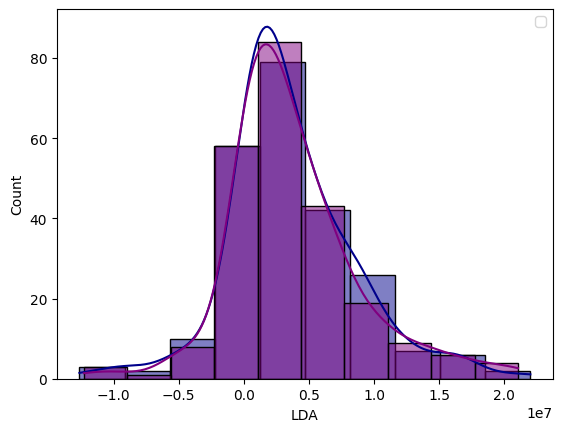

<ipython-input-5-b7fcf9a28fdb>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


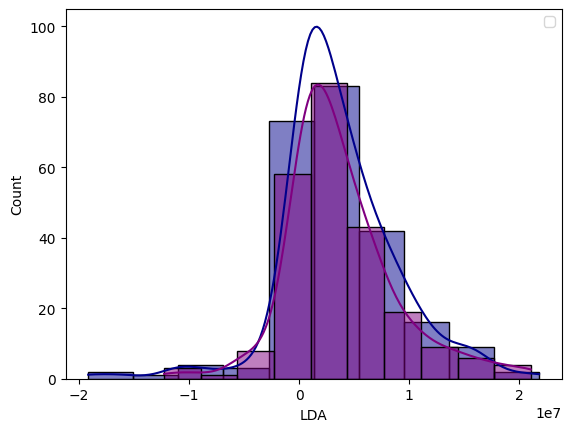

<ipython-input-5-b7fcf9a28fdb>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


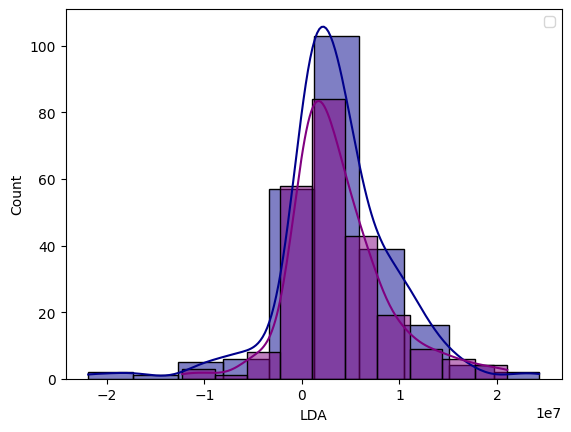

In [ ]:
graficar(LDAo, LDAe1)
graficar(LDAo, LDAe2)
graficar(LDAo, LDAe3)
graficar(LDAo, LDAe4)

#medidas de tendencia central observados

In [ ]:
MEDo=metricas(LDAo)
print('La media es:', MEDo[0])
print('La varianza es:', MEDo[1])
print('La desviacion estandar es:', MEDo[2])
print('El coeficiente de asimetria es:', MEDo[3])
print('El coeficiente de kurtosis es:', MEDo[4])
print('El error muestral es:', MEDo[5])
print('el tipo de distribucion es:', MEDo[6])
LS=MEDo[0]+2*MEDo[2]
print('El limite superior de los datos internos es:', LS)
LI=MEDo[0]-2*MEDo[2]
print('El limite inferior de los datos internos es:', LI)

u=np.mean(LDAo) #limite superior perdidas esperadas (zona1)
OpVar=np.percentile(LDAo,0.999) #valor asegurado OpVar (zona3)
PNE=(u+OpVar)/2 #perdidas esperadas (zona2)

print('Las perdidas esperadas son:\n',u)
print('las perdidas no esperadas son:\n',PNE)
print('el valor de las perdidas catastroficas:\n',OpVar)


La media es: 3770378.847216564
La varianza es: 24846802647976.566
La desviacion estandar es: 4984656.72318331
El coeficiente de asimetria es: 0.7967502679254971
El coeficiente de kurtosis es: 1.9883078154306553
El error muestral es: 325163.1515067054
el tipo de distribucion es: Posible distribucion uniforme
El limite superior de los datos internos es: 13739692.293583184
El limite inferior de los datos internos es: -6198934.599150055
Las perdidas esperadas son:
 3770378.847216564
las perdidas no esperadas son:
 -2054324.5960043115
el valor de las perdidas catastroficas:
 -7879028.039225187


#medidas de tendencia central finca 1

In [ ]:
MED1=metricas(LDAe1)
print('La media es:', MED1[0])
print('La varianza es:', MED1[1])
print('La desviacion estandar es:', MED1[2])
print('El coeficiente de asimetria es:', MED1[3])
print('El coeficiente de kurtosis es:', MED1[4])
print('El error muestral es:', MED1[5])
print('el tipo de distribucion es:', MED1[6])
LS=MED1[0]+2*MED1[2]
print('El limite superior de los datos internos es:', LS)
LI=MED1[0]-2*MED1[2]
print('El limite inferior de los datos internos es:', LI)

La media es: 3648873.460819753
La varianza es: 32632794931642.707
La desviacion estandar es: 5712512.138424102
El coeficiente de asimetria es: 0.34801432551395545
El coeficiente de kurtosis es: 3.8477074531903943
El error muestral es: 372643.20355525933
el tipo de distribucion es: Posible distribucion Weibull
El limite superior de los datos internos es: 15073897.737667957
El limite inferior de los datos internos es: -7776150.816028452


#medidas de tendencia central finca 2

In [ ]:
MED2=metricas(LDAe2)
print('La media es:', MED2[0])
print('La varianza es:', MED2[1])
print('La desviacion estandar es:', MED2[2])
print('El coeficiente de asimetria es:', MED2[3])
print('El coeficiente de kurtosis es:', MED2[4])
print('El error muestral es:', MED2[5])
print('el tipo de distribucion es:', MED2[6])
LS=MED2[0]+2*MED2[2]
print('El limite superior de los datos internos es:', LS)
LI=MED2[0]-2*MED2[2]
print('El limite inferior de los datos internos es:', LI)


La media es: 3632318.7444114513
La varianza es: 23971702178329.82
La desviacion estandar es: 4896090.499401519
El coeficiente de asimetria es: 0.4900236881196671
El coeficiente de kurtosis es: 1.8373973937508694
El error muestral es: 319385.72809698584
el tipo de distribucion es: Posible distribucion uniforme
El limite superior de los datos internos es: 13424499.74321449
El limite inferior de los datos internos es: -6159862.254391586


#medidas de tendencia central finca 3

In [ ]:
MED3=metricas(LDAe3)
print('La media es:', MED3[0])
print('La varianza es:', MED3[1])
print('La desviacion estandar es:', MED3[2])
print('El coeficiente de asimetria es:', MED3[3])
print('El coeficiente de kurtosis es:', MED3[4])
print('El error muestral es:', MED3[5])
print('el tipo de distribucion es:', MED3[6])
LS=MED3[0]+2*MED3[2]
print('El limite superior de los datos internos es:', LS)
LI=MED3[0]-2*MED3[2]
print('El limite inferior de los datos internos es:', LI)

La media es: 3617978.618754104
La varianza es: 27025444140456.133
La desviacion estandar es: 5198600.209715702
El coeficiente de asimetria es: -0.056043609659266615
El coeficiente de kurtosis es: 3.0356819592302866
El error muestral es: 339119.2857379064
el tipo de distribucion es: Posible distribucion beta
El limite superior de los datos internos es: 14015179.038185507
El limite inferior de los datos internos es: -6779221.8006772995


#medidas de tendencia central finca 4

In [ ]:
MED4=metricas(LDAe4)
print('La media es:', MED4[0])
print('La varianza es:', MED4[1])
print('La desviacion estandar es:', MED4[2])
print('El coeficiente de asimetria es:', MED4[3])
print('El coeficiente de kurtosis es:', MED4[4])
print('El error muestral es:', MED4[5])
print('el tipo de distribucion es:', MED4[6])
LS=MED4[0]+2*MED4[2]
print('El limite superior de los datos internos es:', LS)
LI=MED4[0]-2*MED4[2]
print('El limite inferior de los datos internos es:', LI)

La media es: 3531558.1041763267
La varianza es: 31903140180507.004
La desviacion estandar es: 5648286.481801981
El coeficiente de asimetria es: -0.37357831711324163
El coeficiente de kurtosis es: 3.67939264412383
El error muestral es: 368453.5836727693
el tipo de distribucion es: Posible distribucion beta
El limite superior de los datos internos es: 14828131.06778029
El limite inferior de los datos internos es: -7765014.859427636


#muestreo confiabilidad muestreo 99,9%

In [ ]:
def muestreo(ND, LDA, p):
  #ND: Número de datos de muestreo
  #dfLDA: Son los datos enviados al método
  #Método: formas de hacer las cosas
  #p: es la confiabilidad del muestreo

  # Convert LDA to Pandas Series if it's a NumPy array
  if isinstance(LDA, np.ndarray):
    LDA = pd.Series(LDA)

  LDAm=LDA.sample(n=ND, replace=True)
  media=np.mean(LDAm)
  LI=media-1.96*np.std(LDAm)/np.sqrt(ND)
  LS=media+1.96*np.std(LDAm)/np.sqrt(ND)

  plt.figure()
  sns.histplot(LDAm,kde= True)
  plt.show()

  cas=skew(LDAm)
  ck=kurtosis(LDAm)

  ek2=((1.96**2)*p*(1-p)/ND)

     #que tipo de distribucion es
  if abs(cas)<0.5 and abs(ck)<0.5:
    tpdst="Posible distribucion normal"
  elif cas>0 and ck>3:
    if ck>=8:
      tpdst="Posible distribucion exponencial"
    elif ck>=6:
      tpdst="Posible distribucion gamma"
    else:
      tpdst="Posible distribucion Weibull"
  elif cas<0 and ck>3:
    tpdst="Posible distribucion beta"
  elif ck<3:
    tpdst="Posible distribucion uniforme"
  else:
    tpdst="No se puede determinar la distribucion"

  return media,LDAm,LI,LS,cas,ck,tpdst,ek2

In [ ]:
counts, bin_edges = np.histogram(LDAo, bins=10)

LI = bin_edges[: -1] #Limite inferiores
LS = bin_edges[1:] #Limites superiores
mc = (LI + LS) / 2 #Mediana de cada intervalo

pdf = counts / sum(counts) # Nos entrega la frecuencia relativa
                           # Porcentaje de datos por intervalo
cdf = np.cumsum(pdf) # Construimos la ruleta
                     # El acumulado de las probabilidades

df = pd.DataFrame(np.column_stack((LI, LS, mc, pdf, cdf)))
df.columns = ['LI', 'LS', 'mc', 'pdf', 'cdf']
df

,LI,LS,mc,pdf,cdf
0,-1.227467e+07,-8.941032e+06,-1.060785e+07,0.012766,0.012766
1,-8.941032e+06,-5.607397e+06,-7.274214e+06,0.004255,0.017021
2,-5.607397e+06,-2.273761e+06,-3.940579e+06,0.034043,0.051064
3,-2.273761e+06,1.059874e+06,-6.069437e+05,0.246809,0.297872
4,1.059874e+06,4.393509e+06,2.726692e+06,0.357447,0.655319
5,4.393509e+06,7.727145e+06,6.060327e+06,0.182979,0.838298
6,7.727145e+06,1.106078e+07,9.393962e+06,0.080851,0.919149
7,1.106078e+07,1.439442e+07,1.272760e+07,0.038298,0.957447
8,1.439442e+07,1.772805e+07,1.606123e+07,0.025532,0.982979
9,1.772805e+07,2.106169e+07,1.939487e+07,0.017021,1.000000


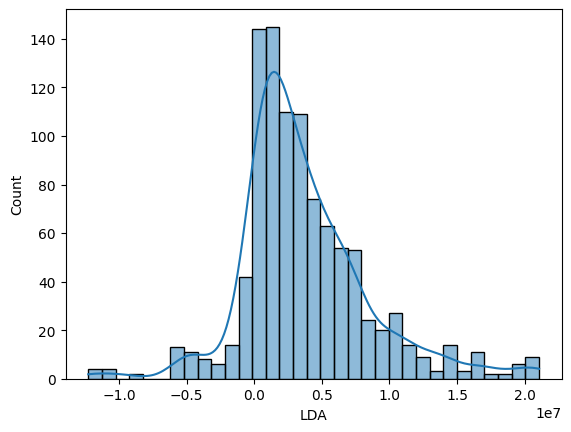

La medida de los datos es: 3734950.4717351934
el limite inferior es:
 3438312.0926811905
el limite superior es:
 4031588.8507891963
el coeficiente de asimetria es:
 0.8747592370995174
el coeficiente de kurtosis es:
 2.4175212856669823
el tipo de distribucion es:
 Posible distribucion uniforme
el error estimado es:
 3.837758400000003e-06


In [ ]:
#Muestreo  una confiabilidad el 99,9%
media999,LDAm999, LI999, LS999, cas999,ck999,tpdst999,ek2999=muestreo(1000,LDAo,0.999)
print("La medida de los datos es:", media999)
print('el limite inferior es:\n',LI999)
print('el limite superior es:\n',LS999)
print('el coeficiente de asimetria es:\n',cas999)
print('el coeficiente de kurtosis es:\n',ck999)
print('el tipo de distribucion es:\n',tpdst999)
print('el error estimado es:\n',ek2999)

#Graficas para integracion

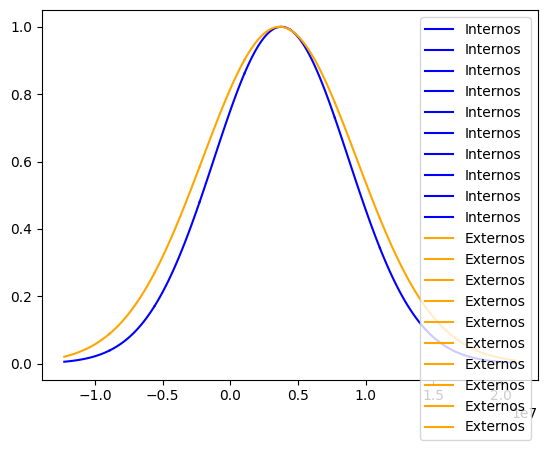

In [ ]:
#GRAFICA 1
X = np.linspace(LI, LS, 100)
VPo = np.exp(-0.5*((X-MEDo[0])/MEDo[2])**2)
VPe = np.exp(-0.5*((X-MED1[0])/MED1[2])**2)
plt.figure()
plt.plot(X, VPo, color = 'blue', label = 'Internos')
plt.plot(X, VPe, color = 'orange', label = 'Externos')
plt.legend()
plt.show()

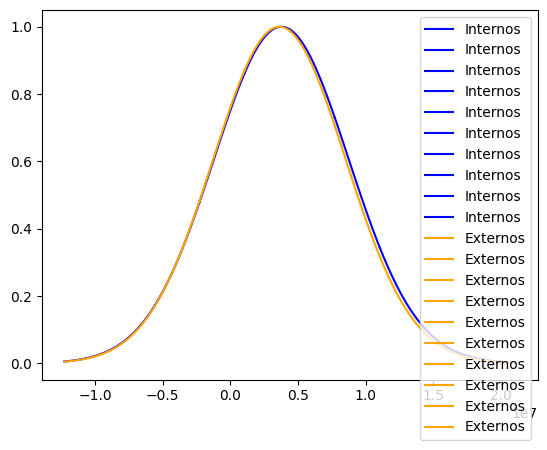

In [ ]:
#GRAFICA 2
X = np.linspace(LI, LS, 100)
VPo = np.exp(-0.5*((X-MEDo[0])/MEDo[2])**2)
VPe = np.exp(-0.5*((X-MED2[0])/MED2[2])**2)
plt.figure()
plt.plot(X, VPo, color = 'blue', label = 'Internos')
plt.plot(X, VPe, color = 'orange', label = 'Externos')
plt.legend()
plt.show()

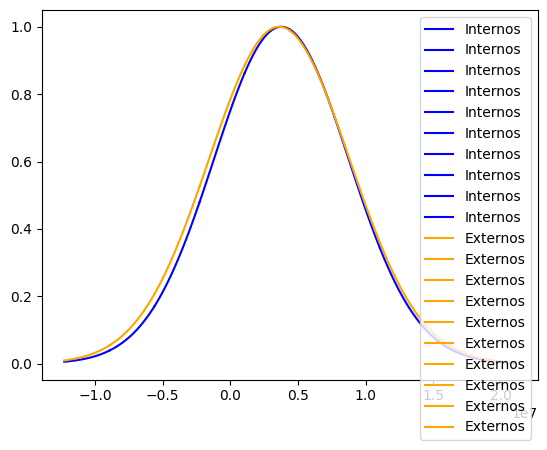

In [ ]:
#GRAFICA 3
X = np.linspace(LI, LS, 100)
VPo = np.exp(-0.5*((X-MEDo[0])/MEDo[2])**2)
VPe = np.exp(-0.5*((X-MED3[0])/MED3[2])**2)
plt.figure()
plt.plot(X, VPo, color = 'blue', label = 'Internos')
plt.plot(X, VPe, color = 'orange', label = 'Externos')
plt.legend()
plt.show()

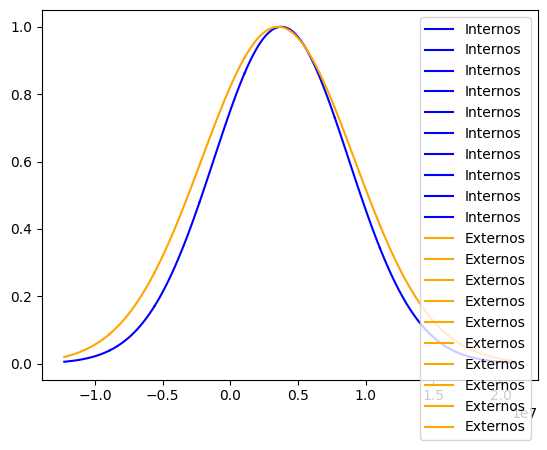

In [ ]:
#GRAFICA 4
X = np.linspace(LI, LS, 100)
VPo = np.exp(-0.5*((X-MEDo[0])/MEDo[2])**2)
VPe = np.exp(-0.5*((X-MED4[0])/MED4[2])**2)
plt.figure()
plt.plot(X, VPo, color = 'blue', label = 'Internos')
plt.plot(X, VPe, color = 'orange', label = 'Externos')
plt.legend()
plt.show()

#Integracion de los datos

In [ ]:
def integracion (XLDAo,XLDA,MEDo,MEDx):
  xint = XLDA #Los datos de integración son los internos
  #Evaluamos los datos externos, con respecto a la estructura interna
  VPoint = np.exp(-0.5*((xint-MEDo[0])/MEDo[2])**2)

  #Evaluamos los datos externos con respecto a la estructura externa.
  VPeint = np.exp(-0.5*((xint-MEDx[0])/MEDx[2])**2)

  #Donde los datos externos esten por debajo de los datos internos
  filas = np.where(VPeint<=VPoint)[0]
  XDint = XLDA.iloc[filas]
  #Se integran los datos
  LDAo2 = np.concatenate((XLDAo,XDint))

  return LDAo2,XDint

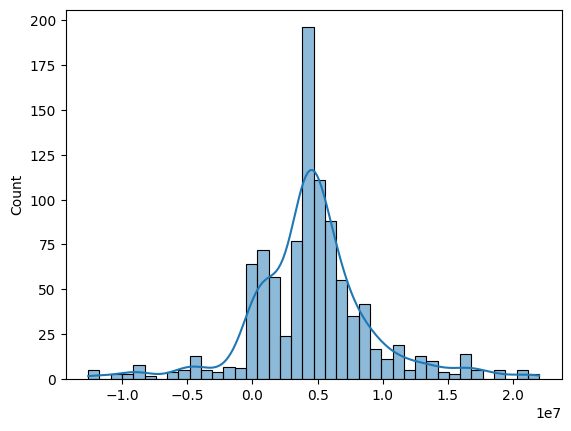

var media
3770378.847216564
4590589.792760627
-0.21754072436237376
var var
24846802647976.566
22427807610592.688
0.09735639114841495
var std
4984656.72318331
4735800.630367867
0.0499244194004433
var cas
0.7967502679254971
0.21546379548015185
0.7295717313768139
var kurt
1.9883078154306553
2.702119137736105
-0.35900443420569794
var error
325163.1515067054
149759.16536423634
0.5394337744904405


In [ ]:
LDAoF1 = integracion(LDAo,LDAe1,MEDo, MED1)
235-len(LDAoF1[0])
LM=np.array(LDAoF1[1])
LMo=np.array(LDAo)
LM1=np.concatenate((LMo,LM))

# Métricas Datos Originales
LDAomet=metricas(LDAo)

LDAoF2 = integracion(LDAo,LDAe2,MEDo, MED2)
LM=np.array(LDAoF2[1])
LM1=np.concatenate((LM1,LM))

LDAoF3 = integracion(LDAo,LDAe3,MEDo, MED3)
LM=np.array(LDAoF3[1])
LM1=np.concatenate((LM1,LM))

LDAoF4 = integracion(LDAo,LDAe4,MEDo,MED4)
LM=np.array(LDAoF4[1])
LM1=np.concatenate((LM1,LM))

#Métricas de los Datos Integrados y Muestreados
LM2=muestreo(1000, LM1, 0.999)
LM2met=metricas(LM2[1])
vs=['var media','var var','var std','var cas','var kurt','var error']
for i in range(6):
  print(str(vs[i]))
  print(LDAomet[i])
  print(LM2met[i])
  print((LDAomet[i]-LM2met[i])/LDAomet[i])

In [ ]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
dfLDAoF1 = pd.DataFrame(LM1)
dfLDAoF2 = pd.DataFrame(LM2[1])

import xlsxwriter
with pd.ExcelWriter("multiples_hojas.xlsx", engine="xlsxwriter") as writer:
    dfLDAoF1.to_excel(writer, sheet_name="F1", index=False)
    dfLDAoF2.to_excel(writer, sheet_name="F2", index=False)

In [ ]:
def variacion (XLDA):
  cas_despues = XLDA[3]
  cas_antes = MEDo[3]
  var_cas = ((cas_antes-cas_despues)/cas_antes)*100

  kur_despues = XLDA[4]
  kur_antes = MEDo[4]
  var_kur = ((kur_antes-kur_despues)/kur_antes)*100

  return var_cas, var_kur

In [ ]:
def Credibilidad(LDAo,LDAe):
  #LDAo: indica los datos observados INTERNOS
  #LDAe: indica los datos observados EXTERNOS
  NDo = len(LDAo); NDe = len(LDAe)
  varo = np.var(LDAo); vare = np.var(LDAe)
  uo = np.mean(LDAo); ue = np.mean(LDAe)

  EPV = (NDo*varo + NDe*vare)/(NDo + NDe)
  MH = (NDo*uo + NDe*ue)/(NDo + NDe)  # Media hipotetica
  Cr = EPV

  pNDo = NDo/(NDe + NDo); pNDe = NDe/(NDo + NDe)
  VHM = pNDo*uo**2 + pNDe*ue**2 # Varianza de los datos con respecto a un punto central o la media hipotetica - que tan alejados estan los datos
  Cr = NDo / (NDo+(EPV/VHM))

  return Cr

In [ ]:
C0 = Credibilidad(LDAo,LDAo)
C1 = Credibilidad(LDAo,LDAoF1[0])
C2 = Credibilidad(LDAo,LDAoF2[0])
C3 = Credibilidad(LDAo,LDAoF3[0])
C4 = Credibilidad(LDAo,LDAoF4[0])

In [ ]:
mint1 = metricas(LDAoF1[0])
mint2 = metricas(LDAoF2[0])
mint3 = metricas(LDAoF3[0])
mint4 = metricas(LDAoF4[0])

from tabulate import tabulate
def agrupar_datos():
    datos = {
        "Tipo": ["Datos Internos", "Finca 1", "Finca 2", "Finca 3","Finca 4"],
        "media": [MEDo[0], mint1[0], mint2[0], mint3[0],mint4[0]],
        "desviación estandar": [MEDo[2], mint1[2], mint2[2], mint3[2],mint4[2]],
        "asimetría": [MEDo[3], mint1[3], mint2[3], mint3[3],mint4[3]],
        "curtosis": [MEDo[4], mint1[4], mint2[4], mint3[4],mint4[4]],
        "variación asimetría": [MEDo[0] ,variacion(mint1)[0], variacion(mint2)[0], variacion(mint3)[0],variacion(mint4)[0]],
        "variación curtosis": [MEDo[4],variacion(mint1)[1], variacion(mint2)[1], variacion(mint3)[1],variacion(mint4)[1]],
        "Credibilidad": [C0,C1,C2,C3,C4]
        }


    df = pd.DataFrame(datos)
    return df

# Uso de la función
df_resultante = agrupar_datos()
print(tabulate(df_resultante, headers='keys', tablefmt='grid'))

+----+----------------+-------------+-----------------------+-------------+------------+-----------------------+----------------------+----------------+
|    | Tipo           |       media |   desviación estandar |   asimetría |   curtosis |   variación asimetría |   variación curtosis |   Credibilidad |
+====+================+=============+=======================+=============+============+=======================+======================+================+
|  0 | Datos Internos | 3.77038e+06 |           4.98466e+06 |    0.79675  |    1.98831 |           3.77038e+06 |              1.98831 |       0.992617 |
+----+----------------+-------------+-----------------------+-------------+------------+-----------------------+----------------------+----------------+
|  1 | Finca 1        | 3.78925e+06 |           4.83379e+06 |    0.809619 |    2.28964 |          -1.61516     |            -15.1552  |       0.992879 |
+----+----------------+-------------+-----------------------+-------------+-------

**ANALISIS DE RESULTADOS**

Una Empresa del Sector Palmicultor esta interesada en la caracterización del riesgo asociado con la pérdida de productividad mensual en sus operaciones. Para la caracterización de las operaciones del negocio de la Empresa Palmicultora, esta posee una base de datos escasa (Datos Observados), para lo cual la empresa esta interesa en la caracterización del riesgo mediante el muestreo de sus datos, así como la integración de datos de fincas cercanas a su producción.

Con el objetivo de identificar si la integracion de las demas fincas a los datos observados se identifico que: teniendo en cuenta la credibilidad todas las integraciones con las demas fincas dio de un 99% lo que no es necesario la integracion de los datos externos porque los observados son los que tienen mas importancia.

Además analizando las metricas del LDAo (Distribucion de perdidas de los observados) con los datos que estan integrados y muestrados hubo diferencias en la media con una variacion del 28%, variacion de la asimetria de un 45% y un error de 53%. Por tal motivo, la integracion teniendo en cuenta las metricas seria mejor rechazar esa integracion y realizar el estudio con los datos observados sin la integracion principalmente por la credibilidad.

